In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [42]:
from networkx.algorithms.threshold import find_threshold_graph, is_threshold_graph

In [3]:
# G = nx.fast_gnp_random_graph(10, .1)
# nx.draw_circular(G, with_labels=True, font_weight='bold')


In [4]:
# nx.write_gml(G,'test.gml')

In [44]:
G_2 = nx.read_gml('test.gml')

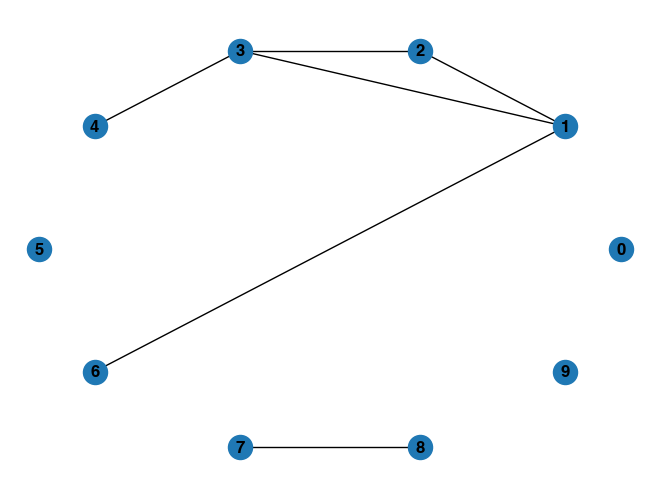

In [6]:
nx.draw_circular(G_2, with_labels = True, font_weight='bold')

In [7]:
list(nx.connected_components(G_2))

[{'0'}, {'1', '2', '3', '4', '6'}, {'5'}, {'7', '8'}, {'9'}]

In [8]:
nx.number_connected_components(G_2)

5

In [9]:
nx.edge_betweenness(G_2)

{('1', '2'): 0.044444444444444446,
 ('1', '3'): 0.08888888888888889,
 ('1', '6'): 0.08888888888888889,
 ('2', '3'): 0.044444444444444446,
 ('3', '4'): 0.08888888888888889,
 ('7', '8'): 0.022222222222222223}

In [10]:
nx.number_of_edges(G_2)

6

In [11]:
G_2.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '6'), ('2', '3'), ('3', '4'), ('7', '8')])

In [12]:
nx.subgraph_centrality(G_2)

{'0': 1.0,
 '1': 3.5712178774109766,
 '2': 2.858343240954937,
 '3': 3.5712178774109757,
 '4': 1.6632340684887565,
 '5': 1.0,
 '6': 1.663234068488755,
 '7': 1.5430806348152435,
 '8': 1.5430806348152435,
 '9': 1.0}

In [17]:
list(nx.biconnected_components(G_2))

[{'3', '4'}, {'1', '2', '3'}, {'1', '6'}, {'7', '8'}]

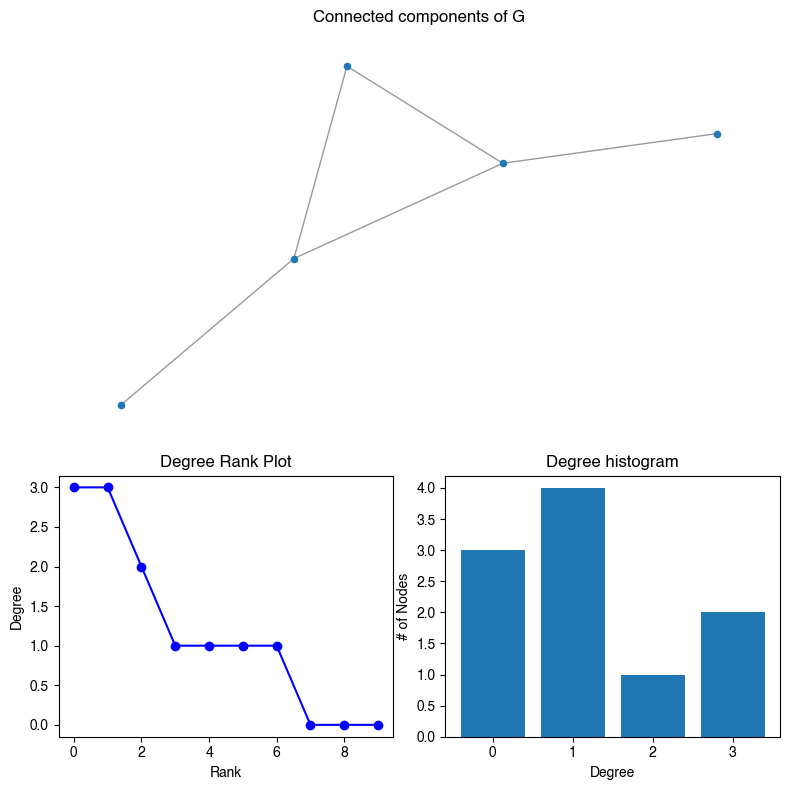

In [45]:
degree_sequence = sorted((d for n, d in G_2.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_2.subgraph(sorted(nx.connected_components(G_2), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()